In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clean_students_performance_data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i, df[i].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [5]:
for i in df.columns:
  if df[i].dtype == 'int64':
    print(i, 'Max: ',df[i].max(), 'Min: ',df[i].min())

math score Max:  100 Min:  0
reading score Max:  100 Min:  17
writing score Max:  100 Min:  10
total score Max:  300 Min:  27


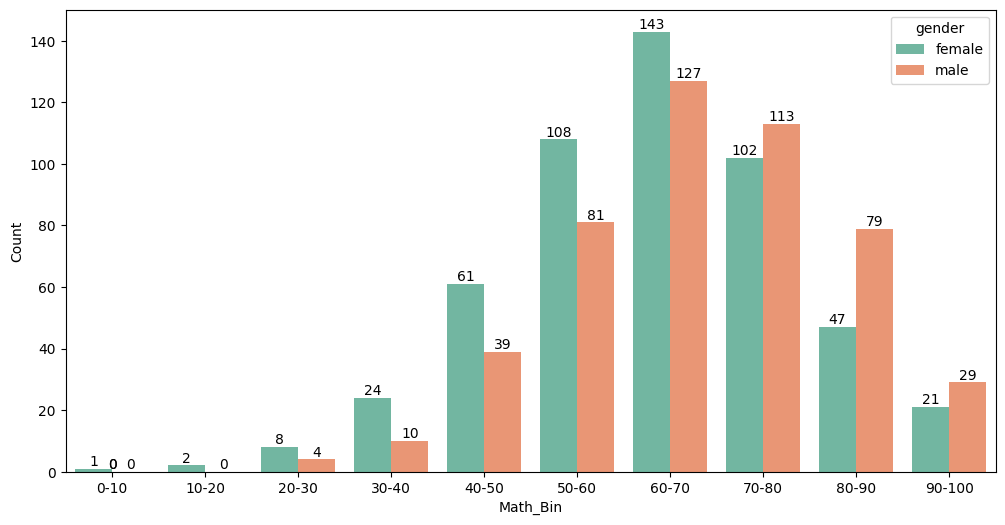

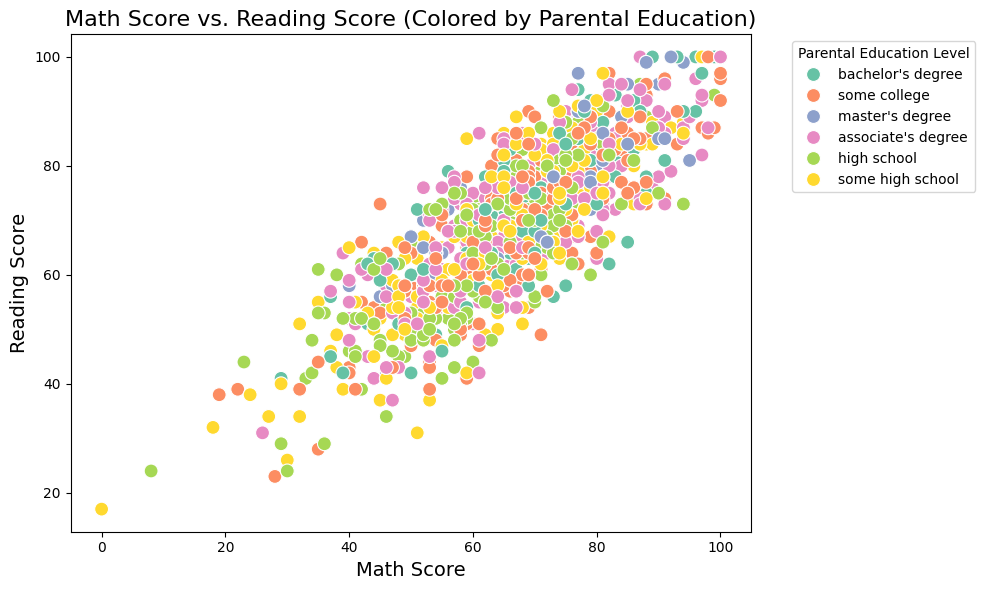

<ipython-input-6-6d559d542184>:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender", title_fontsize=12, fontsize=12)


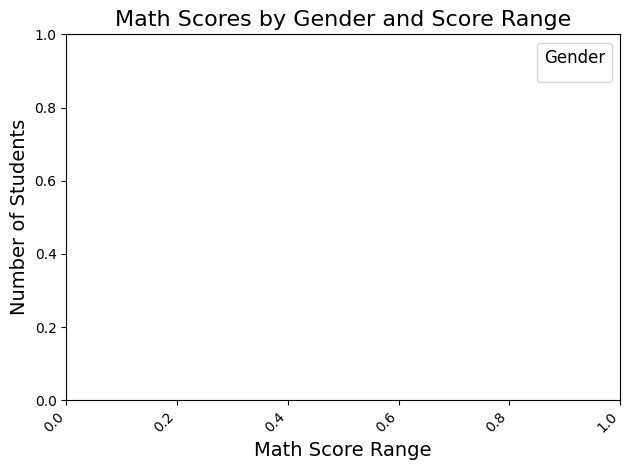

<Figure size 640x480 with 0 Axes>

In [6]:
# Define bins and labels for score ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]

df["Math_Bin"] = pd.cut(df["math score"], bins=bins, labels=labels)

grouped_data = df.groupby(
    ["gender", "Math_Bin"],
    observed=False
).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
ax = sns.barplot(
    x="Math_Bin",
    y="Count",
    hue="gender",
    data=grouped_data,
    palette="Set2",
    errorbar=None,
    dodge=True,
)

# Add data labels
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

<ipython-input-7-da3cd33d2561>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


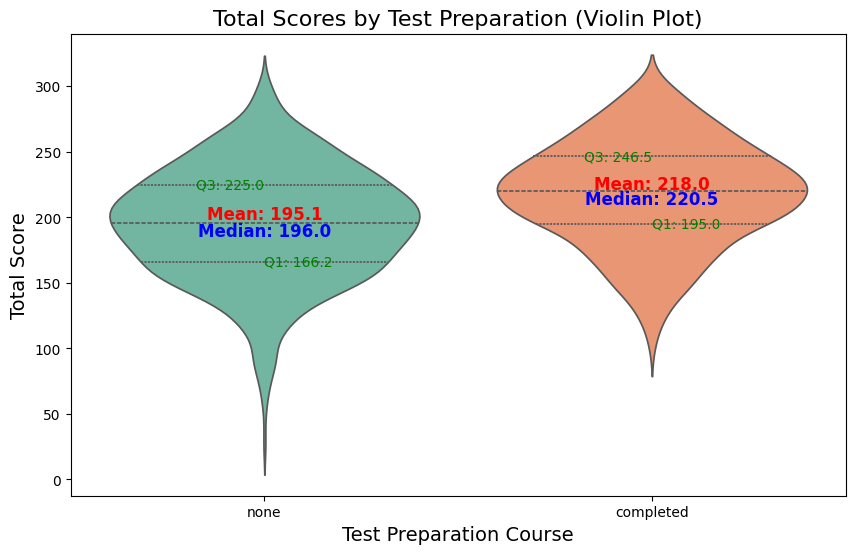

<Figure size 640x480 with 0 Axes>

In [7]:
# Violin Plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    x='test preparation course',
    y='total score',
    data=df,
    palette="Set2",
    inner="quartile",
)

# Calculate and annotate mean, median, and quartiles
for i, group in enumerate(df['test preparation course'].unique()):
    group_data = df[df['test preparation course'] == group]['total score']

    mean = group_data.mean()
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    ax.text(i, mean, f'Mean: {mean:.1f}', color='red', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(i, median, f'Median: {median:.1f}', color='blue', ha='center', va='top', fontsize=12, fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', color='green', ha='left', va='center', fontsize=10)
    ax.text(i, q3, f'Q3: {q3:.1f}', color='green', ha='right', va='center', fontsize=10)

# Add title and labels
plt.title("Total Scores by Test Preparation (Violin Plot)", fontsize=16)
plt.xlabel("Test Preparation Course", fontsize=14)
plt.ylabel("Total Score", fontsize=14)
plt.show()
plt.savefig("students_performance_project/results/Total Scores by Test Preparation (Violin Plot).png")

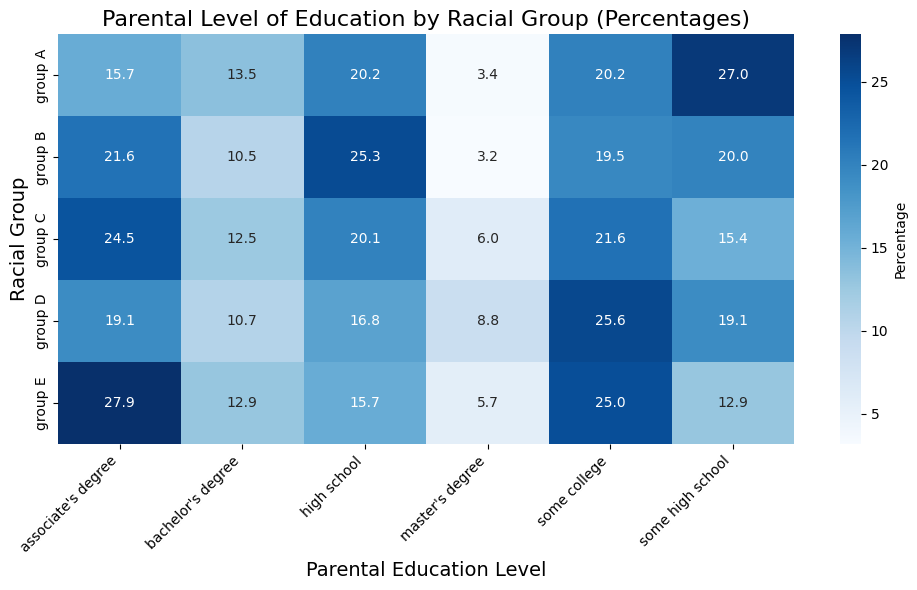

<Figure size 640x480 with 0 Axes>

In [8]:
# Create a cross-tabulation of race/ethnicity and parental level of education
cross_tab = pd.crosstab(df['race/ethnicity'], df['parental level of education'])


cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot heatmap with percentages
plt.figure(figsize=(10, 6))
sns.heatmap(
    cross_tab_percentage,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar=True,
    cbar_kws={'label': 'Percentage'}
)

# Add title and labels
plt.title("Parental Level of Education by Racial Group (Percentages)", fontsize=16)
plt.xlabel("Parental Education Level", fontsize=14)
plt.ylabel("Racial Group", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig("students_performance_project/results/Parental Level of Education by Racial Group (Percentages).png")

<ipython-input-9-b969dd50ae40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


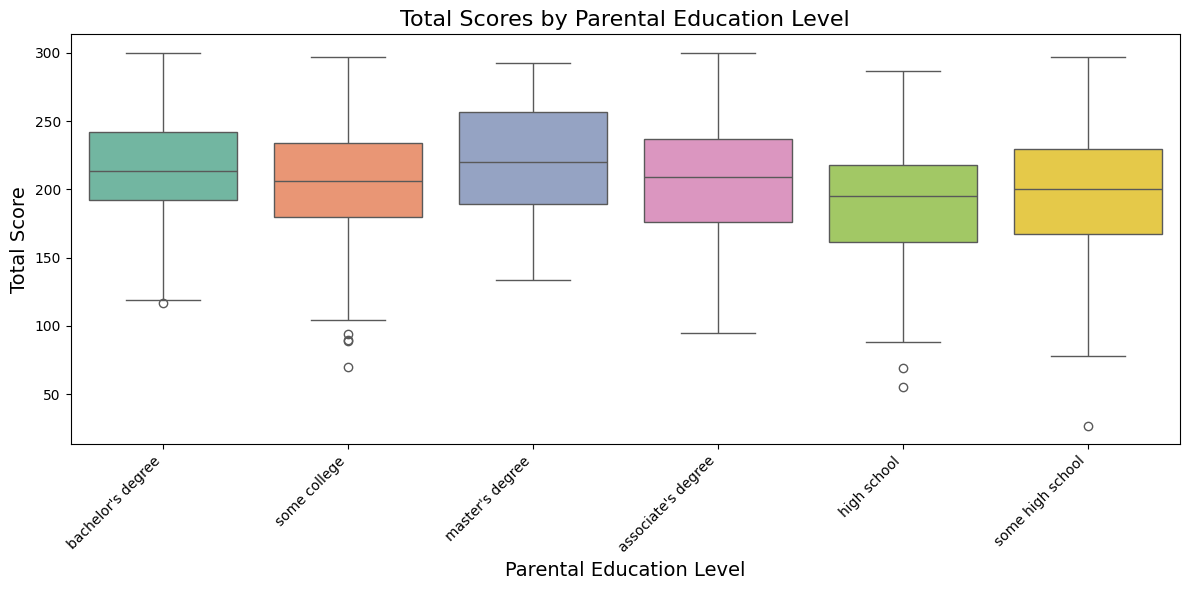

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='parental level of education',
    y='total score',
    data=df,
    palette='Set2'
)

# Add title and labels
plt.title("Total Scores by Parental Education Level", fontsize=16)
plt.xlabel("Parental Education Level", fontsize=14)
plt.ylabel("Total Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig("students_performance_project/results/Total Scores by Parental Education Level.png")

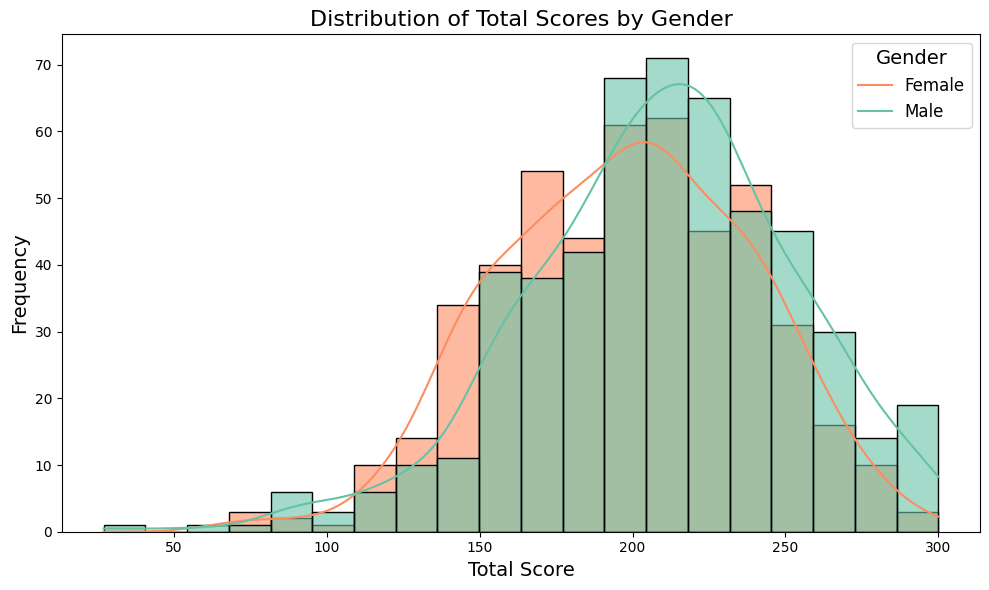

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='total score',
    hue='gender',  # Group by gender
    kde=True,  # Add kernel density estimate
    palette='Set2',
    bins=20,  # Number of bins
    alpha=0.6,  # Transparency
    edgecolor='black'  # Add edge color to bars
)

# Add title and labels
plt.title("Distribution of Total Scores by Gender", fontsize=16)
plt.xlabel("Total Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize the legend
plt.legend(
    title="Gender",
    labels=["Female", "Male"],  # Explicitly set legend labels
    loc='upper right',  # Position of the legend
    fontsize=12,  # Font size of the legend
    title_fontsize=14  # Font size of the legend title
)

plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("students_performance_project/results/Distribution of Total Scores by Gender.png")